# K Nearest Neighbor 

#### 정의
- 가장 근접해 있는 데이터들을 이용하여 예측하는 알고리즘

#### 특징
- 간단함 : 트레이닝 데이터셋이 곧 모델(근방의 데이터들을 기준으로 예측하므로)
- Lazy model : 예측을 위해서 항상 계산을 해줘야 함(트레이닝 데이터가 많을 경우 예측 수행 시 오래걸릴 가능성이 높음)
- 노이즈에 강함 : 학습 데이터 내에 포함된 이상치에 크게 영향을 받지 않음(참조 : https://ratsgo.github.io/machine%20learning/2017/04/17/KNN/)
- Hyper Parameter : 근방에 탐색할 데이터 수(k), 데이터 간의 거리(d) 
(k가 작으면 overfitting 가능성 높고 k가 크면 underfitting 될 가능성이 높음)

#### 관련 sklearn 패키지

- KNeighborsClassifier  : http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- KNeighborsRegressor : http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
- train_test_split :http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

### 1. KNN Theory

#### 1.1 Type of algorithm

KNN은 분류 및 회귀 예측 문제 모두에 사용가능하다. KNN은 지도학습 알고리즘에 속한다. 우리의 목표는 $ x $를 활용하여 알지 못하는 $ y $를 자신있게 예측할 수 있는 $ h(x) $ 함수를 학습하는 것이다.


#### 1.2 Distance measure

분류 문제에서 k-최근접 이웃(K-nearest neighbor algorithm)은 새로 들어온 x값과 가장 가까운 k개의 점들 중에서 과반수를 가지는 y값을 선택한다. 유사성은 두 데이터 포인트 간의 거리로 정의된다. knn은 일반적으로 새로 들어온 x값과 지정된 트레이닝 x값들 간의 유클리드 거리를 기반으로 한다. $x_{i}$는 $p$개의 변수 $(x_{i1}, x_{i2},..., x_{ip})$를 가지는 하나의 입력값이고, $n$은 입력값$(i=1,2,...,n)$의 총 개수이다. 샘플 $x_{i}$와 $x_{l}$ 사이의 유클리드 거리는 다음과 같이 정의된다.


$$d(x_{i}, x_{l}) = \sqrt{(x_{i1} - x_{l1})^2 + (x_{i2} - x_{l2})^2 + ... + (x_{ip} - x_{lp})^2}$$

때로는 다른 측정 값이 주어진 설정에 더 적합 할 수 있으며 the Manhattan, Chebyshev and Hamming distance를 포함 할 수 있다.

#### 1.3 Algorithm steps

STEP 1: 이웃 수 k를 선택하라

STEP 2: 새로운 x값에 대하여 트레이닝 셋과의 유클리디언 거리가 가장 가까운 k개의 이웃 점을 찾아라

STEP 3: k개의 이웃들이 가지는 각 y값 별 나타난 횟수를 세어라

STEP 4: k개의 이웃 중에 가장 많이 등장한 y값을 새로운 x값에 대한 예측 y값으로 할당하라

### 2. k-NN 예시

##### n_neighbors=1

In [1]:
import pandas as pd

from sklearn import datasets, linear_model

import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

import seaborn as sns
from seaborn.linearmodels import corrplot,symmatplot

import numpy as np

import os

import math

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

import mglearn

%matplotlib inline

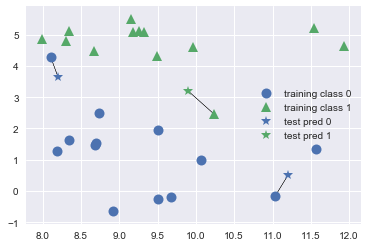

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

##### n_neighbors=3

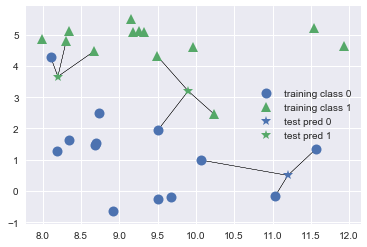

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

##### Decision boundary by k(1,3,9)

/Users/jinseokryu/anaconda/envs/tensorflow/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


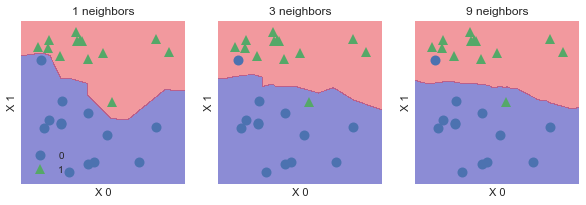

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

fig, axes = plt.subplots(1,3,figsize= (10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax )
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("X 0")
    ax.set_ylabel("X 1")
    
axes[0].legend(loc=3)

### 3. Importing and preperation of data

#### 3.1 Import libraries

In [5]:
import numpy as np
import pandas as pd
import os

#### 3.2 Load dataset

NOTE : Iris 데이터 셋은 50개의 다양한 꽃 데이터를 가지고 iris는 세종류를 가진다.

In [6]:
# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/RyuJiseung/2018_Daegue_Bigdata_Camp/master/knn/Iris.csv')

#### 3.3 Summarize the Dataset

In [7]:
# We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.
dataset.shape

(150, 6)

In [8]:
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
# Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

#### 3.4 Dividing data into features and labels

NOTE: iris 데이터는 6개의 변수를 가지고 있다(Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species)

In [11]:
# 먼저 우리는  X(features)와 y(labels)로 나누어야 한다.
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values

# Alternative way of selecting features and labels arrays:
# X = dataset.iloc[:, 1:5].values
# y = dataset.iloc[:, 5].values

#### 3.5 Label encoding

NOTE: Species는 범주형 변수이다. KNeighborsClassifier는 string 형태를 받아들이지 못하기 때문에 우리는 숫자 형태로 바꿔줘야 한다. Iris-setosa는 0이고, Iris-versicolor는 1 and Iris-virginica는 2로 대체한다.

In [12]:
print(y[[48,53,99,102]])

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica']


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y[[48,53,99,102]])

[0 1 1 2]


#### 3.6 Spliting dataset into training set and test set

이제 모델이 잘 작동하는지 알아보기 위해서 학습셋과 테스트셋으로 나누어보자

In [14]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

여기서는 변수 값들이 비슷한 스케일을 가지고 있기 때문에 scaling을 하지 않아도 된다. 그러나 다른 데이터 셋에서는 scaling을 해주는 것이 매우 중요하다.

### 4. Data Visualization

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 4.1. Parallel Coordinates

Parallel coordinates는 다변량 데이터를 시각화하기 위한 기법이다. 이를 통해 데이터의 클러스터를 보고 새로운 시각을 얻을 수도 있다. Parallel coordinates는 한 점이 하나의 선분으로 연결된다. 각 수직선은 하나의 속성을 나타낸다.

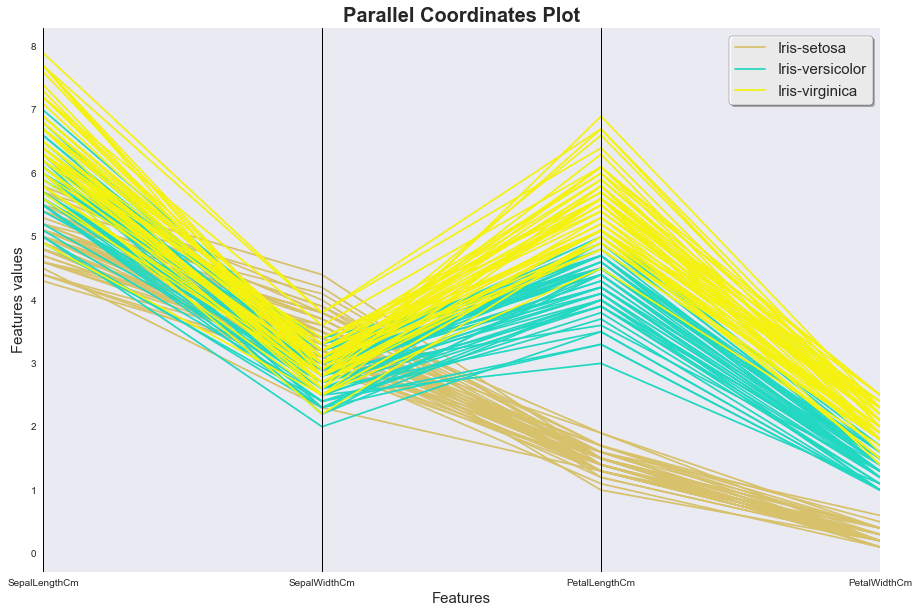

In [16]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset.drop("Id", axis=1), "Species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

#### 4.2. Pairplot

Pairwise는 데이터 집합의 하위 집합 내에서 변수의 분포 또는 여러 변수 간의 관계를 시각화하려는 경우에 유용하다.

NOTE: 하나의 꽃 종류는 다른 두 종류와 선형적으로 분리되지만 다른 두 종류는 잘 분리되지 않는다.

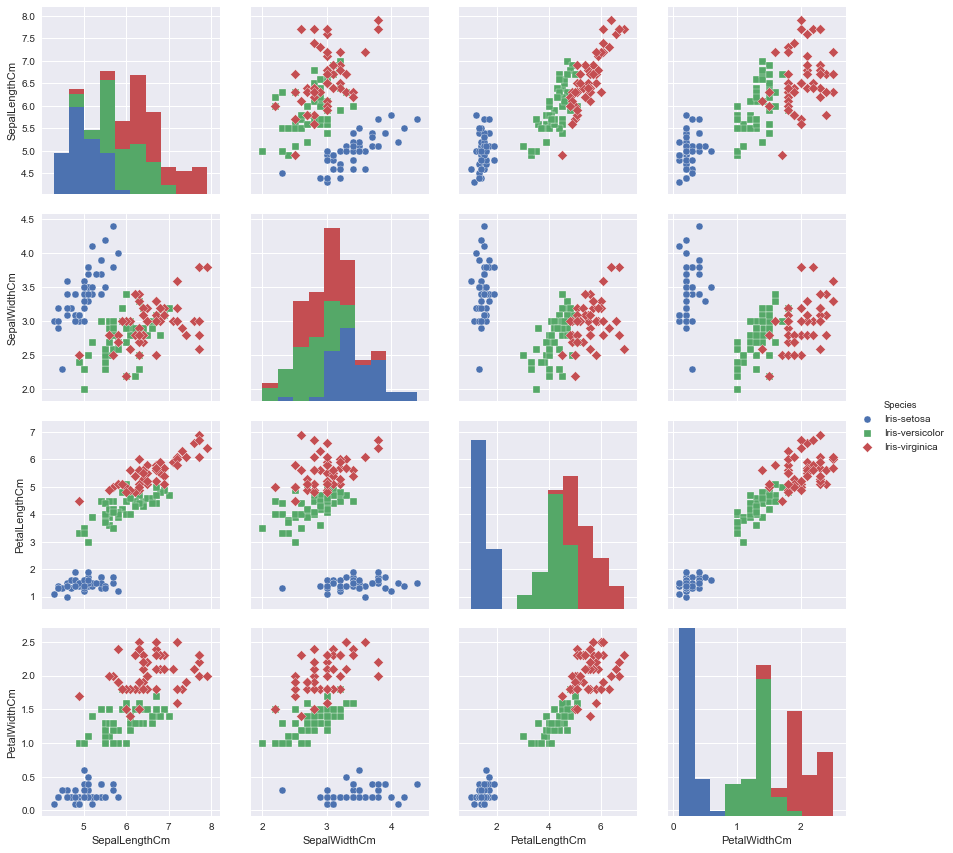

In [17]:
plt.figure()
sns.pairplot(dataset.drop("Id", axis=1), hue = "Species", size=3, markers=["o", "s", "D"])
plt.show()

#### 4.3. Boxplots

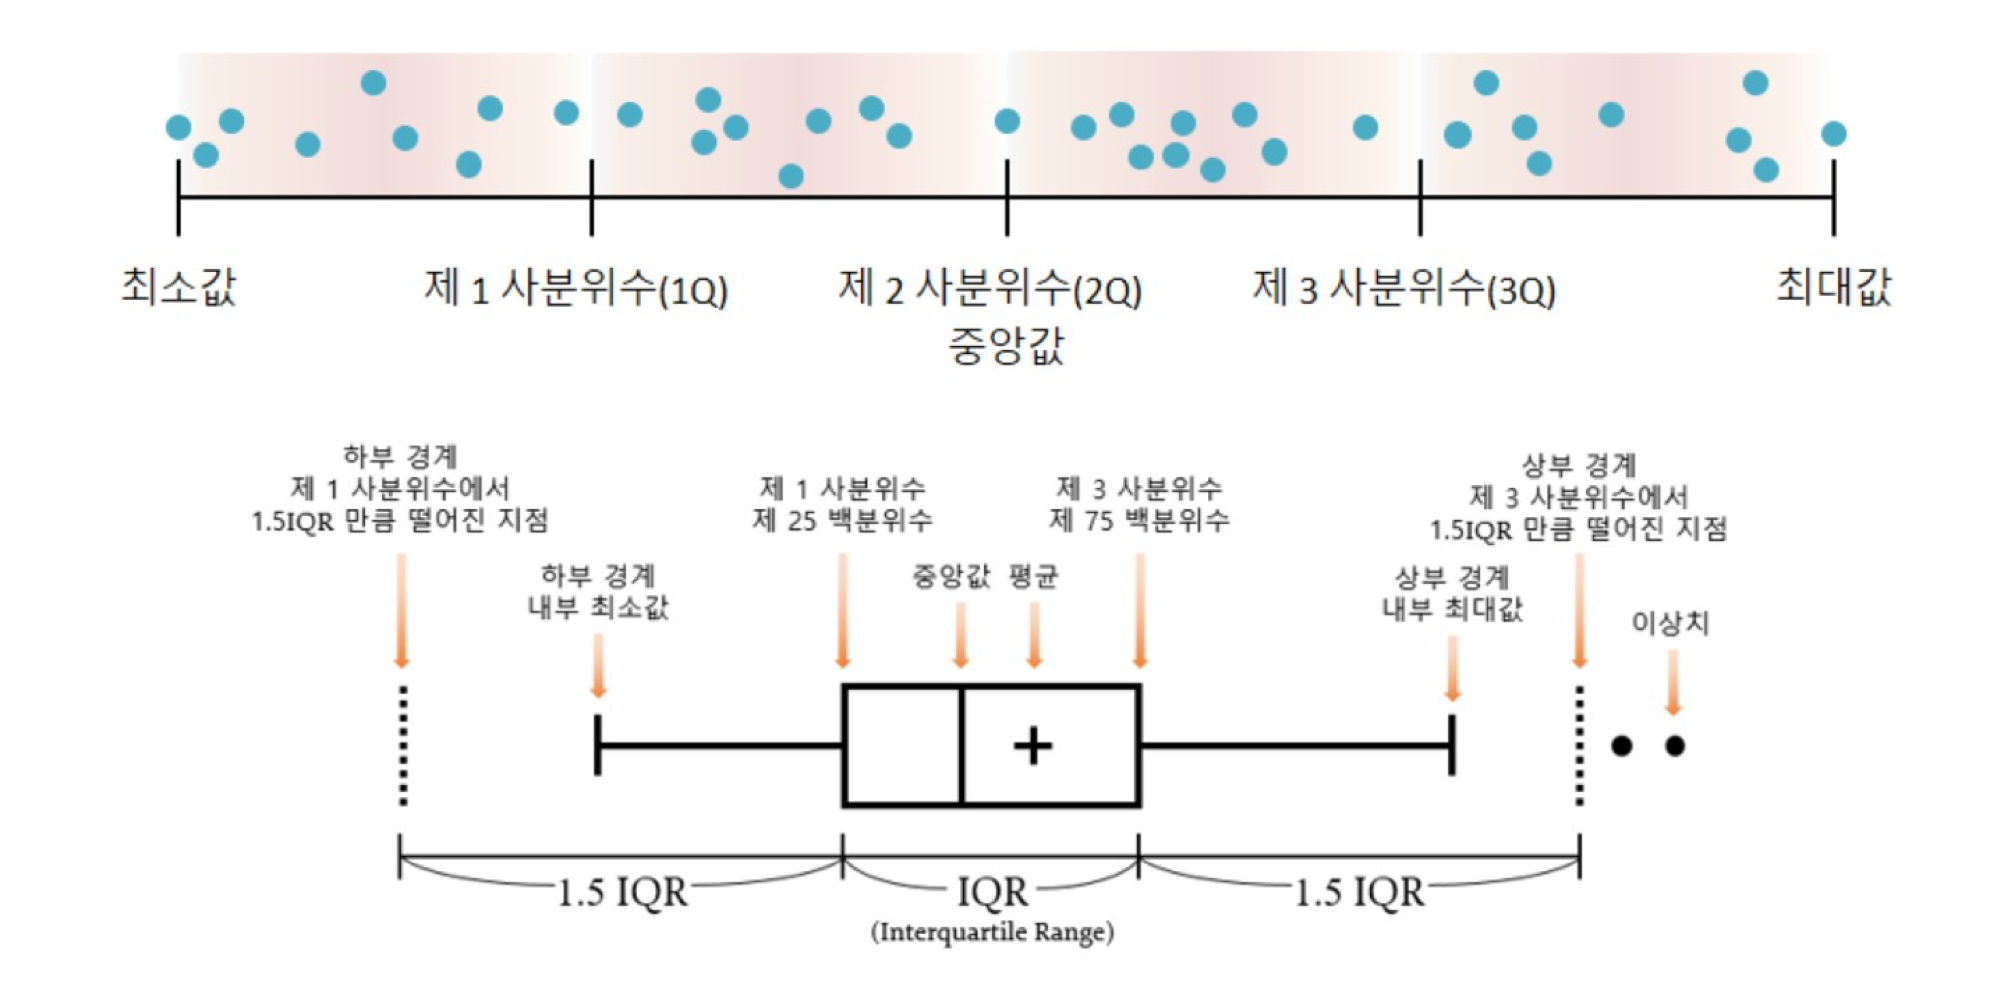

In [18]:
from IPython.display import Image
Image("./boxplot.png")

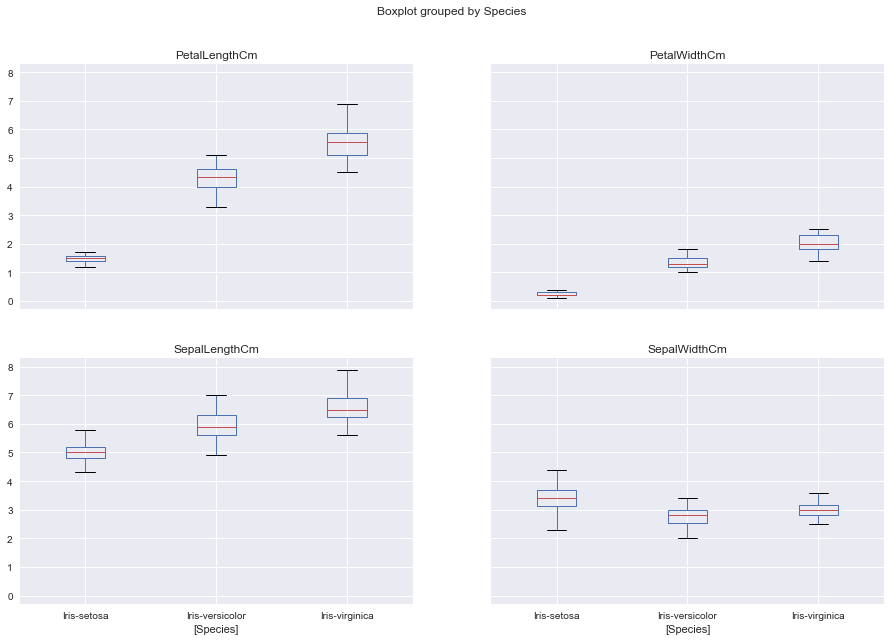

In [19]:
plt.figure()
dataset.drop("Id", axis=1).boxplot(by="Species", figsize=(15, 10))
plt.show()

#### 4.4. 3D visualization

객체의 색상, 모양, 크기 및 기타 속성을 사용하여 3D로 고차원 데이터 세트를 시각화 할 수도 있다.

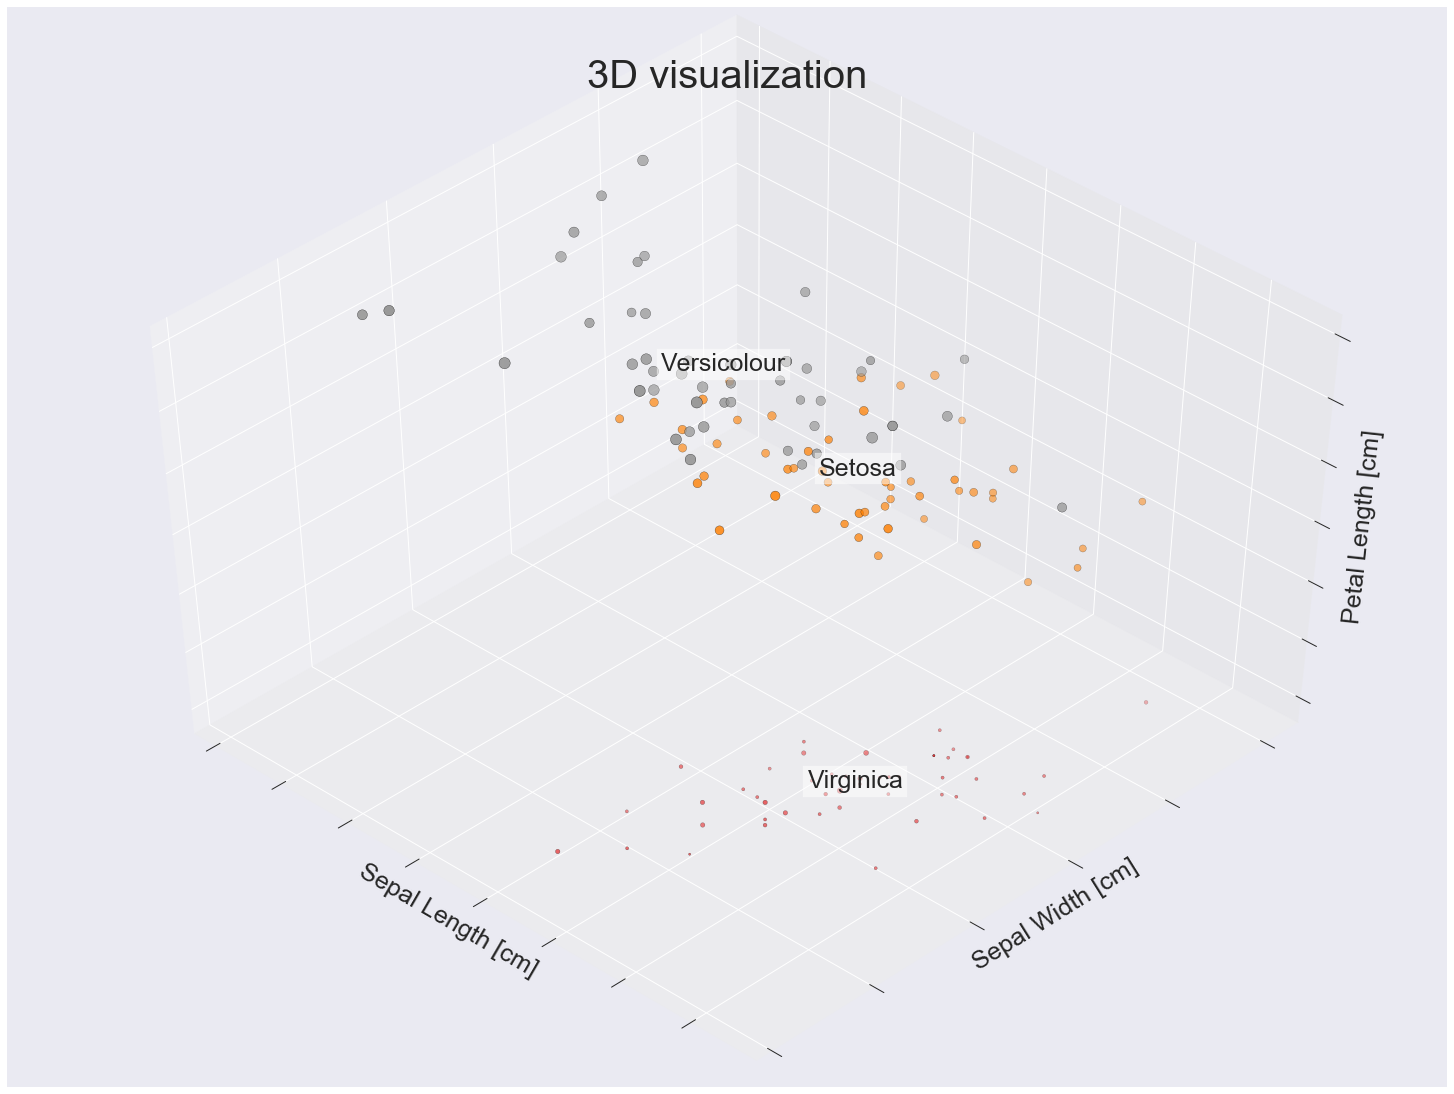

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

# ax.view_init(azim=0)
plt.show()

### 5. Using KNN for classification

#### 5.1. Making predictions

In [21]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#### 5.2. Evaluating predictions

Building confusion matrix:

In [22]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Calculating model accuracy:

In [23]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


#### 5.3. Using cross-validation for parameter tuning:

In [24]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

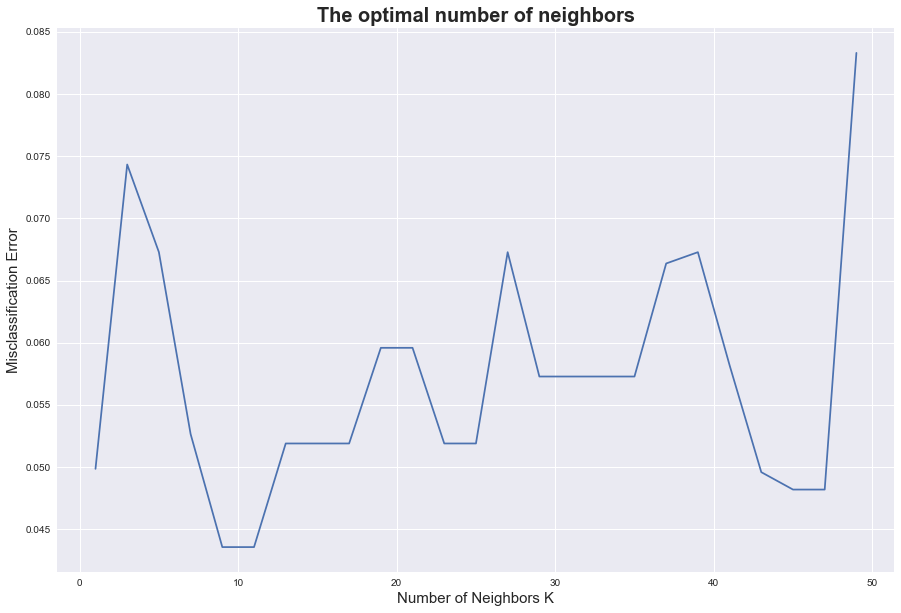

In [25]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [26]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.


### 6. My own KNN implementation

In [27]:
import numpy as np
import pandas as pd
import scipy as sp

class MyKNeighborsClassifier():
    """
    My implementation of KNN algorithm.
    """
    
    def __init__(self, n_neighbors=5):
        self.n_neighbors=n_neighbors
        
    def fit(self, X, y):
        """
        Fit the model using X as array of features and y as array of labels.
        """
        n_samples = X.shape[0]
        # number of neighbors can't be larger then number of samples
        if self.n_neighbors > n_samples:
            raise ValueError("Number of neighbors can't be larger then number of samples in training set.")
        
        # X and y need to have the same number of samples
        if X.shape[0] != y.shape[0]:
            raise ValueError("Number of samples in X and y need to be equal.")
        
        # finding and saving all possible class labels
        self.classes_ = np.unique(y)
        
        self.X = X
        self.y = y
        
    def predict(self, X_test):
        
        # number of predictions to make and number of features inside single sample
        n_predictions, n_features = X_test.shape
        
        # allocationg space for array of predictions
        predictions = np.empty(n_predictions, dtype=int)
        
        # loop over all observations
        for i in range(n_predictions):
            # calculation of single prediction
            predictions[i] = single_prediction(self.X, self.y, X_test[i, :], self.n_neighbors)

        return(predictions)

In [28]:
def single_prediction(X, y, x_train, k):
    
    # number of samples inside training set
    n_samples = X.shape[0]
    
    # create array for distances and targets
    distances = np.empty(n_samples, dtype=np.float64)

    # distance calculation
    for i in range(n_samples):
        distances[i] = (x_train - X[i]).dot(x_train - X[i])
    
    # combining arrays as columns
    distances = sp.c_[distances, y]
    # sorting array by value of first column
    sorted_distances = distances[distances[:,0].argsort()]
    # celecting labels associeted with k smallest distances
    targets = sorted_distances[0:k,1]

    unique, counts = np.unique(targets, return_counts=True)
    return(unique[np.argmax(counts)])

In [29]:
# Instantiate learning model (k = 3)
my_classifier = MyKNeighborsClassifier(n_neighbors=3)

# Fitting the model
my_classifier.fit(X_train, y_train)

# Predicting the Test set results
my_y_pred = my_classifier.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, my_y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


### 7. Bibliography

1. MIT Lecture: https://www.youtube.com/watch?v=09mb78oiPkA
2. Iris dataset: https://www.kaggle.com/uciml/iris
3. Theory: http://www.scholarpedia.org/article/K-nearest_neighbor

4. https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
5. https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/
6. https://www.analyticsvidhya.com/blog/2014/10/introduction-k-neighbours-algorithm-clustering/
7. https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification